<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-3-Deep-Learning/blob/main/module2-convolutional-neural-networks/LS_DS17_432_Convolutional_Neural_Networks_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

Modern __computer vision__ approaches rely heavily on convolutions as both a dimensionality reduction and feature extraction method. Before we dive into convolutions, let's talk about some of the common computer vision applications: 
* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* and *countless* more 

We are going to focus on classification and pre-trained classification today. What are some of the applications of image classification?

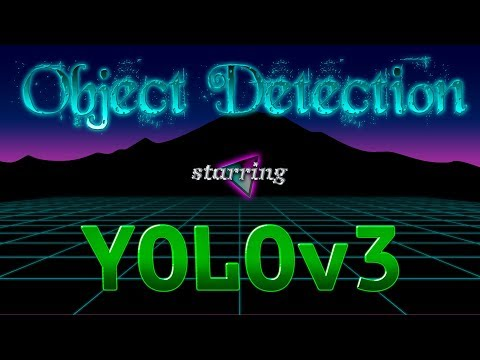

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview

Like neural networks themselves, CNNs are inspired by biology - specifically, the receptive fields of the visual cortex.

Put roughly, in a real brain the neurons in the visual cortex *specialize* to be receptive to certain regions, shapes, colors, orientations, and other common visual features. In a sense, the very structure of our cognitive system transforms raw visual input, and sends it to neurons that specialize in handling particular subsets of it.

CNNs imitate this approach by applying a convolution. A convolution is an operation on two functions that produces a third function, showing how one function modifies another. Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input.

One common confusion - the term "convolution" is used to refer to both the process of computing the third (joint) function and the process of applying it. In our context, it's more useful to think of it as an application, again loosely analogous to the mapping from visual field to receptive areas of the cortex in a real animal.

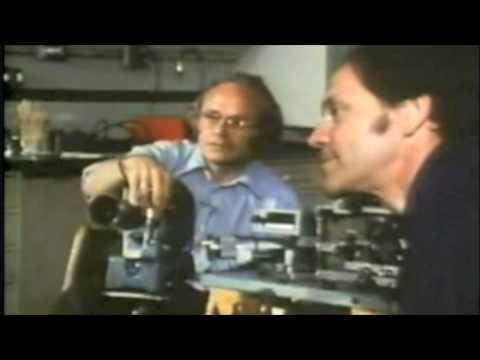

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=600, height=400)

### Image data
A monochrome image is of one color represented by 0 to 255. A gray scale is an example of monochrome with black 0 and white 255. scaling up or down the numbers does not change the information. For a colored image we do need to mix three colors of red, blue and green, which are primary colors of the most effeective additive color system. To implement that we use three channels. Each channel is a monochrom of one of those colors.

<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/colorcodes.png">

### Convolutional Neural Networks
In ANN all the inputsamples are related to eachother equally through a densly connected network. For images the nearby pixels are more related to eachother than the pixels that are far apart. CNN instead of equally connected weights uses a kernel to process the neighboring pixels locally. Hence for image processing we prefer CNN rather than regular ANN. That would allow to extract features such as edge, face, sharpness from the image. different features would require different kernels or filters for extraction. Additionally the filters can be stack in parallel as well as in series to model more dimensions. To convolution operation starts by placing the weighted kernel at one corner of the image and translate the overlap window to a single number by the weighted sum of the numbers. By striding to the right and then down the entire image is going to be sacanned. In convolution layer we usually stride with steps of 1 and in pooling we stride we bigger steps as we intend to reduce the size of the outcome. Similar to ANN in CNN we train the filter weights. One approach is to extract some features with convolutional layer and then use pooling to zoom into certain features and apply convolutional layers again to extract detailed information on focused objects and repeat this process. After each convolutional layer we have an activation ReLu.

<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/convolution-operation-24.png">

### Padding
Convolving an image with a kernel reduces the size of the output image and leads to loss of information. To formulize that, if the input image is of size $nxn$ and the kernel is $fxf$ and stride stepping is $s$, the output image is of size of one for the initial placement plus the remaining strides left to take. The outcome size is round up of: $$(1+\frac{n-f}{s})\times(1+\frac{n-f}{s})$$

To avoid the loss of information, the surrounding of the image is padded with selected numbers. Most commonly with 0 representing the white background. ALternatively, it could be padded with the nearby values are average of them. To bring the size of the outcome to that of the original image, the total columns of padding, $p$, in one direction (ex/ both left and right padding columns) needs to be:$$p = n(s-1)+f-s$$

### Pooling
The initiall input samples are typically large, let's say 254x254=65K. Adding multiple filters would dramatically increase the number of parameters to handle this computing challenge pooling technique is applied which is basically extrating the more important features in the first pass and zooming in on those with sebsequent convolutional layers to get more relevant details instead of getting details from everything that might not be relevant to begin with. There are different pooling filters for different tasks. The most common one is maxpooling which takes the maximum number in a pooling window as the most important feature. In pooling we takes larger strides (typically non overlapping to help reduce the size. Pooling  helps to speed up computation as it makes some of the features it detects a bit more robust.

<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/pooling-on-volume1.png">


### Output size for conv and maxpooling layers:
Both conv and max pooling layers work with $$(1+\frac{n+p-f}{s})\times(1+\frac{n+p-f}{s})$$. 
Here p is the total number of padding columns/rows. fis the filter size, n is the input data size and s is number of strides.
It seems keras ignore the last fractional column or rows where the filter does not fully overlap. Hence if the calculation is not a whole number you need to round it down.

### 1D, 2D, 3D Convolutional layer:
This simply refers to the dimension of convolutional ioperation. In other words the dimensions that the filter scan. If the scan is along a line from left to right it's 1D layer. If the scan is additionally from top to bottom in a x-y coordinate, then it's 2D Conv layer. In that sense a color image with three channel is still considered 2D, as there are no information to scan along the channels, or going from one channel to another. However for a video there are x-y image as well as the sequence of images in time which contains information about the content of the input. Hence scanning along the time adds a third dimension and needs a 3D convolutional layer.

<p float="left">
  <img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/Convolutional_NeuralNetworkFeatureLayers.gif" width="400" />
  <img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/2D_3D.png" width="400" /> 
</p>



### Convolution Operation on Volume
When the input has more than one channels (e.g. an RGB image), the filter should have matching number of channels. To calculate one output cell, perform convolution on each matching channel, then add the result together.
<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/convolution-operation-on-volume5.png">

The total number of multiplications to calculate the result is (4 x 4) x (3 x 3 x 3) = 432

### Convolution Operation with Multiple Filters
Multiple filters can be used in a convolution layer to detect multiple features. The output of the layer then will have the same number of channels as the number of filters in the layer.
<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/convolution-with-multiple-filters2.png">

The total number of multiplications to calculate the result is (4 x 4 x 2) x (3 x 3 x 3) = 864

### One Convolution Layer
Finally to make up a convolution layer, a bias (ϵ R) is added and an activation function such as ReLU or tanh is applied.

<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/one-convolution-layer1.png">

### Flattening
Once the data is processed with consecutive convolutional and pooling layers we flatten the data into a giant one dimensional array and connect is to a fully connected dense layer as it's more suitable for the final task of classification.

### Overall Architecture:
As the layers go deeper and deeper, the features that the model deals with become more complex. For example, at the early stage of ConvNet, it looks up for oriented line patterns and then finds some simple figures. At the deep stage, it can catch the specific forms of objects and finally able to detect the object of an input image.
<img src="https://github.com/skhabiri/ML-DeepLearning/raw/main/images/cnn_arch2.png">

### Convolution

Consider blurring an image - assume the image is represented as a matrix of numbers, where each number corresponds to the color value of a pixel.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*


Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

* Padding is there to keep the size of the image the same as the size of the original image

In [7]:
"""
Imageio is a Python library that provides an easy interface to read and write 
a wide range of image data, including animated images, volumetric data, 
and scientific formats.
"""
import imageio
import matplotlib.pyplot as plt
# scikit-image is a collection of algorithms for image processing.
from skimage import color, io
from skimage.exposure import rescale_intensity

austen = io.imread('https://github.com/skhabiri/ML-DeepLearning/raw/main/images/austen_allred.jpg')
austen.shape

(400, 400, 3)

In [15]:
austen[0][0]

array([25, 20, 16], dtype=uint8)

In [29]:
austen_gray = color.rgb2gray(austen)
print(austen_gray.shape, type(austen_gray), austen_gray[0][0])
austen_gray.min(), austen_gray.max()

(400, 400) <class 'numpy.ndarray'> 0.0814670588235294


(0.0008333333333333333, 1.0)

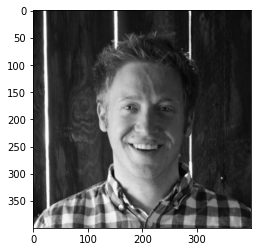

In [24]:
plt.imshow(color.rgb2gray(austen), cmap='gray')

In [30]:
# rescale it between 0 and 1
austen_grayscale = rescale_intensity(color.rgb2gray(austen))
print(austen_grayscale.shape, austen_grayscale[0][0])
austen_grayscale.min(), austen_grayscale.max()

(400, 400) 0.08070097630378255


(0.0, 1.0)

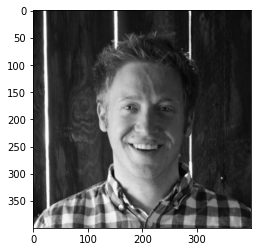

In [31]:
plt.imshow(austen_grayscale, cmap="gray");

In [32]:
import numpy as np
# Multidimensional image processing
import scipy.ndimage as nd

horizontal_edge_convolution = np.array([[1,1,1,1,],
                                        [0,0,0,0],
                                        [0,0,0,0],
                                        [-1,-1,-1,-1]])

vertical_edge_convolution = np.array([[1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1]])

diag_edge_convolution = np.array([[1,0,0,-1],
                                  [0,1,-1,0],
                                  [0,-1,1,0],
                                  [-1,0,0,1]])

austen_edges_diag = nd.convolve(austen_grayscale, diag_edge_convolution)
austen_edges_horz = nd.convolve(austen_grayscale, horizontal_edge_convolution)
austen_edges_vert = nd.convolve(austen_grayscale, vertical_edge_convolution)

austen_edges_horz.shape, austen_edges_vert.shape, austen_edges_diag.shape

((400, 400), (400, 400), (400, 400))

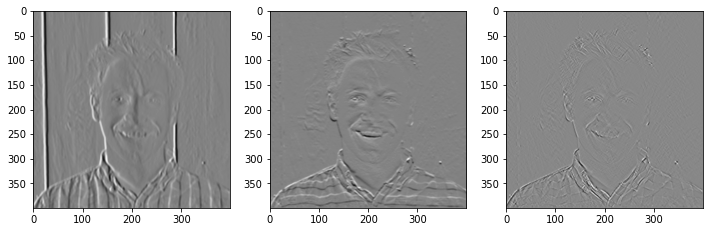

In [33]:
fig, axes = plt.subplots(figsize=(12,4))
plt.subplot(1,3, 1).imshow(austen_edges_vert, cmap="gray");
plt.subplot(1,3, 2).imshow(austen_edges_horz, cmap="gray");
plt.subplot(1,3, 3).imshow(austen_edges_diag, cmap="gray");

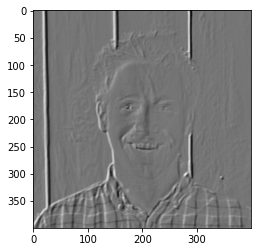

In [34]:
austen_edges = austen_edges_horz + austen_edges_vert
plt.imshow(austen_edges, cmap='gray')

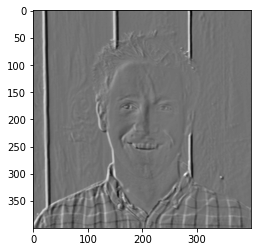

In [35]:
plt.imshow(austen_edges + austen_edges_diag, cmap='gray')

(400, 400, 3)

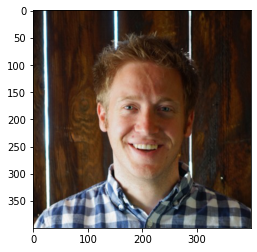

In [44]:
plt.imshow(austen)
austen.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


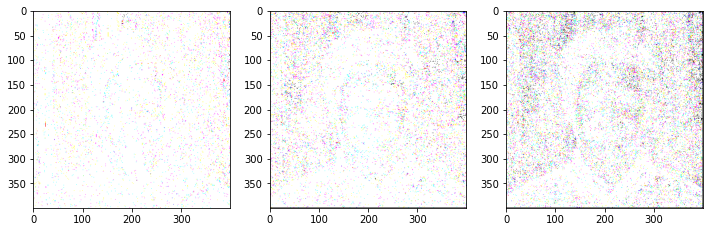

In [50]:
austen_edges_horzC = np.zeros((400, 400, 3))
austen_edges_vertC = np.zeros((400, 400, 3))
austen_edges_diagC = np.zeros((400, 400, 3))

for i in range(3):
    austen_edges_horzC[:,:,i] = nd.convolve(austen[:,:,i], horizontal_edge_convolution)
    austen_edges_vertC[:,:,i] = nd.convolve(austen[:,:,i], vertical_edge_convolution)
    austen_edges_diagC[:,:,i] = nd.convolve(austen[:,:,i], diag_edge_convolution)

fig, axes = plt.subplots(figsize=(12,4))
plt.subplot(1,3, 1).imshow(austen_edges_vertC);
plt.subplot(1,3, 2).imshow(austen_edges_horzC);
plt.subplot(1,3, 3).imshow(austen_edges_diagC);

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps. 

Let's take a look very simple example using Austen's pic. 

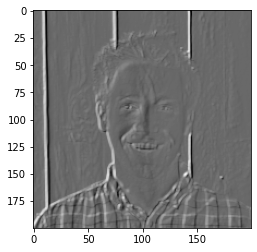

In [51]:
from skimage.measure import block_reduce
"""
block_reduce:
Downsample image by applying function `func` to local blocks.
This function is useful for max and mean pooling, for example.

Parameters
----------
image : ndarray
    N-dimensional input image.
block_size : array_like
    Array containing down-sampling integer factor along each axis.
func : callable
    Function object which is used to calculate the return value for each
    local block. This function must implement an ``axis`` parameter.
    Primary functions are ``numpy.sum``, ``numpy.min``, ``numpy.max``,
    ``numpy.mean`` and ``numpy.median``. 
"""

# block_reduce is a downsampling method
reduced = block_reduce(austen_edges, (2,2), func=np.max)
plt.imshow(reduced, cmap="gray");

In [ ]:
reduced.shape

(200, 200)

The max pooling performed on the image has reduced its size to half. However the main features of the image have remained intact.

# CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:

![Convolutional layer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

The red represents the original input image, and the blue the neurons that correspond.

As shown in the first image, a CNN can have multiple rounds of convolutions, [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) (a digital signal processing technique that effectively reduces the information by passing through a filter), and then eventually a fully connected neural network and output layer. Typical output layers for a CNN would be oriented towards classification or detection problems - e.g. "does this picture contain a cat, a dog, or some other animal?"


#### A Convolution in Action

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)



Why are CNNs so popular?
1. Compared to prior image learning techniques, they require relatively little image preprocessing (cropping/centering, normalizing, etc.)
2. Relatedly, they are *robust* to all sorts of common problems in images (shifts, lighting, etc.)

Actually training a cutting edge image classification CNN is nontrivial computationally - the good news is, with **transfer learning**, we can get one "off-the-shelf"!

## Follow Along

In [52]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [53]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape

170500096/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

255 0


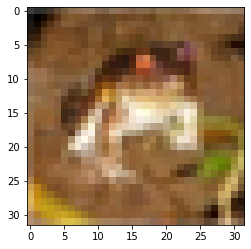

In [56]:
print(train_images.max(), train_images.min())
plt.imshow(train_images[0])

In [57]:
""" Normalize pixel values to be between 0 and 1
This would not change the color or size of the image
"""
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape

(50000, 32, 32, 3)

1.0 0.0


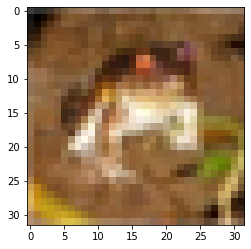

In [58]:
print(train_images.max(), train_images.min())
plt.imshow(train_images[0])

In [59]:
print(train_labels.shape)
train_labels[0:3]

(50000, 1)


array([[6],
       [9],
       [9]], dtype=uint8)

In [94]:
print(train_images.shape)
train_images[0][31][31]

(50000, 32, 32, 3)


array([0.48235294, 0.36078431, 0.28235294])

In [65]:
print(train_labels.shape)
train_labels[0:5]

(50000, 1)


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

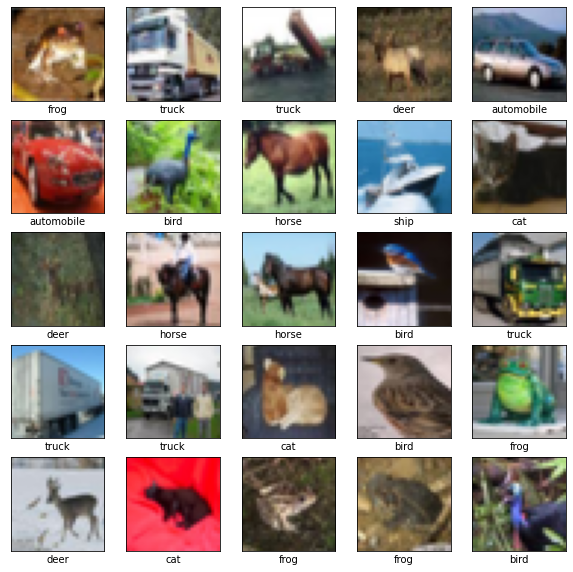

In [83]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    # remove the ticks
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [95]:
train_images[0].shape

(32, 32, 3)

In [96]:
train_labels[1]

array([9], dtype=uint8)

In [97]:
32*32*3

3072

conv2D layer is for feature extraction

In [106]:
# Setup Architecture

model = Sequential()
"""
Conv2D:
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`.

filters: the number of output filters in the convolution

kernel_size: An integer or tuple/list of 2 integers, specifying the height
and width of the 2D convolution window. Can be a single integer to specify
the same value for all spatial dimensions.

strides: strides: An integer or tuple/list of 2 integers, specifying the strides of
    the convolution along the height and width. default=1
    
padding: one of `"valid"` or `"same"` (case-insensitive).
`"valid"` means no padding. `"same"` results in padding evenly to
the left/right or up/down of the input such that output has the same
height/width dimension as the input.

data_format: A string, one of `channels_last` (default) or `channels_first`.
`channels_last` corresponds to inputs with shape `(batch_size, height, width, channels)` 

activation: Activation function to use. If you don't specify anything, no
activation is applied

use_bias: Boolean, whether the layer uses a bias vector.

Input shape:
  4+D tensor with shape: `batch_shape + (channels, rows, cols)` if
    `data_format='channels_first'`
  or 4+D tensor with shape: `batch_shape + (rows, cols, channels)` if
    `data_format='channels_last'`.

Output shape:
  4+D tensor with shape: `batch_shape + (filters, new_rows, new_cols)` if
  `data_format='channels_first'` or 4+D tensor with shape: `batch_shape +
    (new_rows, new_cols, filters)` if `data_format='channels_last'`. 
"""


"""
Max pooling operation for 2D spatial data.

Downsamples the input representation by taking the maximum value over the
window defined by `pool_size` for each dimension along the features axis.
The window is shifted by `strides` in each dimension.  The resulting output
when using "valid" padding option has a shape(number of rows or columns) of:
`output_shape = (1 + input_shape - pool_size) / strides)`

The resulting output shape when using the "same" padding option is:
`output_shape = input_shape / strides`

pool_size: integer or tuple of 2 integers,
window size over which to take the maximum.

strides: Integer, tuple of 2 integers, or None.
If None, it will default to `pool_size`.

padding: One of `"valid"` or `"same"`

data_format: A string, one of `channels_last` (default) or `channels_first`.

Input shape:
  - If `data_format='channels_last'`:
    4D tensor with shape `(batch_size, rows, cols, channels)`.
  - If `data_format='channels_first'`:
    4D tensor with shape `(batch_size, channels, rows, cols)`.

Output shape:
  - If `data_format='channels_last'`:
    4D tensor with shape `(batch_size, pooled_rows, pooled_cols, channels)`.
  - If `data_format='channels_first'`:
    4D tensor with shape `(batch_size, channels, pooled_rows, pooled_cols)`.
"""
# no padding with filter=3x3 and stride=1 reduces 32x32 to 30x30 (1+(32-3)/1)
# input: (32,32, 3) > output = (30,30,32)
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1,
                 input_shape=(32,32,3), data_format='channels_last', padding='valid'))

# down sampling by 2 reduces 30 to 15: 1+(30-2)/2=15;
# input: (30,30,32), output: (15,15,32)
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid', data_format='channels_last'))

# no padding with step of 3x3 reduces 15x15 to 13x13: 1+(15-3)/1=13
# input: (15,15,32), output: (13,13,64)
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# 1+(13-2)/2 rounds down to 6
# input: (13,13,64), output: (6,6,64)
model.add(MaxPooling2D((2,2)))

# 1+(6-3)/1 rounds up to 4
# input: (6,6,64), output: (4,4,64)
model.add(Conv2D(64, (3,3), activation='relu'))

# 4x4x64=1024
model.add(Flatten())

# (1024+1)*64=65600 bias added
model.add(Dense(64, activation='relu'))

# (64+1)*10=650
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [107]:
# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
# Fit Model default batch_size=32
model.fit(train_images, train_labels, epochs=8, validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7985 - accuracy: 0.7207 - val_loss: 0.8933 - val_accuracy: 0.6972
Epoch 2/8
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7498 - accuracy: 0.7364 - val_loss: 0.8639 - val_accuracy: 0.7005
Epoch 3/8
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7106 - accuracy: 0.7504 - val_loss: 0.9621 - val_accuracy: 0.6747
Epoch 4/8
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6720 - accuracy: 0.7627 - val_loss: 0.8795 - val_accuracy: 0.7056
Epoch 5/8
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6385 - accuracy: 0.7761 - val_loss: 0.8686 - val_accuracy: 0.7142
Epoch 6/8
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6054 - accuracy: 0.7867 - val_loss: 0.8973 - val_accuracy: 0.7001
Epoch 7/8
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5747 - accuracy: 0.7966 - val_loss: 0.8959 - val_ac

In [117]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.9101 - accuracy: 0.7097


(32, 32, 3)
(1, 32, 32, 3)
(1, 32, 32, 3)


Text(0, 0.5, 'cat')

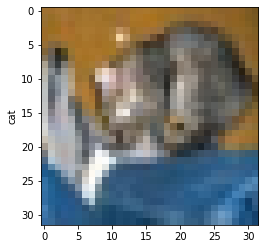

In [118]:
print(test_images[0].shape)
query = np.expand_dims(test_images[0], axis=0)
print(query.shape)

# or alternative way:
print(test_images[0:1].shape)

plt.imshow(test_images[0])
plt.ylabel(class_names[test_labels[0][0]])


In [119]:
predict = model.predict(query)
predict

array([[6.4589372e-03, 5.3426982e-05, 7.2569731e-03, 5.8554637e-01,
        5.7330349e-04, 2.2262888e-01, 1.7267631e-01, 5.6071550e-04,
        2.9635157e-03, 1.2814823e-03]], dtype=float32)

Other different ways to call the model prediction:

In [120]:
model.predict(test_images[0:1])

array([[6.4589372e-03, 5.3426982e-05, 7.2569731e-03, 5.8554637e-01,
        5.7330349e-04, 2.2262888e-01, 1.7267631e-01, 5.6071550e-04,
        2.9635157e-03, 1.2814823e-03]], dtype=float32)

Or directly call the model:

In [121]:
model(query)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[6.4589372e-03, 5.3426982e-05, 7.2569731e-03, 5.8554637e-01,
        5.7330349e-04, 2.2262888e-01, 1.7267631e-01, 5.6071550e-04,
        2.9635157e-03, 1.2814823e-03]], dtype=float32)>

In [122]:
class_names[predict.argmax()]

'cat'

# Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

#### TensorFlow Hub

"A library for reusable machine learning modules"

This lets you quickly take advantage of a model that was trained with thousands of GPU hours. It also enables transfer learning - reusing a part of a trained model (called a module) that includes weights and assets, but also training the overall model some yourself with your own data. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better.

https://www.tensorflow.org/hub/

TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. We'll focus on an **image classifier: ResNet50**.

## Follow Along

### ResNet50

In [227]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  # resNet50 needs a 224x224 image size
  return image.load_img(img_path, target_size=(224, 224))

def img_lookup(img, name):
    """
    img: file name
    name: string for the category of the image to match
    output: list of top prediction and probability and the inquired name if not already the top choice
    """
    # convert the image to ndarray class type
    x = image.img_to_array(img)

    # add a dimension to axis=0
    x = np.expand_dims(x, axis=0)
    
    # resize the image for resNet50
    x = preprocess_input(x)
    
    # Instantiate the pre trained model
    model = ResNet50(weights='imagenet')
    
    # Run prediction
    features = model.predict(x)
    print("features type:", type(features))
    
    # Post process resNet50 prediction results
    results1 = decode_predictions(features, top=3)
#     print("resuls1 are:", type(results1), "\n", results1)
    
    # results1 is a list of list
    results=results1[0]
#     print("\n\n results are:", results)

    # result is a list of tuples (internal_param, name_string, probability)
    predict = []
    predict.append((results[0][1], results[0][2]))
    
    for entry in results[1:]:
        if entry[1] == name:
          predict.append((entry[1], entry[2]))
          return predict
    return predict

In [278]:
from bs4 import BeautifulSoup
import requests
import os
img_dir = "./image_examples"

site = "https://github.com"
main_url = "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/tree/master/sample_data/"

def get_links(url):
    """
    gets list of hyper links with 'a' html tag and 'href' attribute
    The <a> tag defines a hyperlink, which is used to link from one page to another. 
    The most important attribute of the <a> element is the href attribute, 
    which indicates the link's destination. 
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser') 
    links = soup.find_all('a')
#     print("Total Links Found:",links.__len__())
    link_lst = []
    for link in links:
        link_lst.append(link.get('href'))
    return link_lst

links = get_links(main_url)

# list of url paths to search for files
url_list = []
for link in links:
    if link.endswith("_examples"):
        url_list.append(site + link)

for url in url_list:
    print("url:", url)
    links = get_links(url)
    for link in links:
        if link.endswith("jpeg"):
            file_links = get_links(site + link)
            for l in file_links:
                if "raw" in l:
                    raw_url = site + l
                    filename= raw_url.split(sep="/")[-1]
                    filename = os.path.join(img_dir, filename)
                    print(filename)
                    os.makedirs(os.path.dirname(filename), exist_ok=True)
                    with open(filename, 'wb') as f:
                        f.write(requests.get(raw_url).content)
                        
                        
                        
os.makedirs(os.path.dirname(filename), exist_ok=True)                        

url: https://github.com/LambdaSchool/ML-YouOnlyLookOnce/tree/master/sample_data/negative_examples
./image_examples/example10.jpeg
./image_examples/example11.jpeg
./image_examples/example12.jpeg
url: https://github.com/LambdaSchool/ML-YouOnlyLookOnce/tree/master/sample_data/positive_examples
./image_examples/example0.jpeg
./image_examples/example1.jpeg
./image_examples/example2.jpeg


In [ ]:
import requests

def url_response(url):
    path, url = url
    r = requests.get(url, stream = True)
    with open(path, 'wb') as f:
        for ch in r:
            f.write(ch)





In [124]:
# Save a list of url images to files locally
import requests

image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

### skimage
Image is read as ndarray, and can be resize with skimage.transform.resize method

(1500, 2250, 3) <class 'numpy.ndarray'> (224, 224, 3)


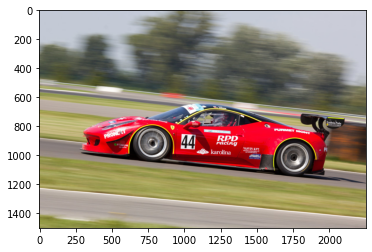

In [205]:
# method2
import skimage
from skimage.transform import resize
img0 = skimage.io.imread(fname="./example0.jpg")
print(img0.shape, type(img0), resize(img0, (224, 224)).shape)
plt.imshow(img0)

### PIL.Image
Image is read as `PIL.Image` type and can be resized with `Image.resize()` method. converted to ndarray using `np.array()` or saved back as image using `Image.fromarray().save()`.

In [207]:
import PIL
print('Pillow Version:', PIL.__version__)
from PIL import Image
img0 = Image.open('example0.jpg')

# resize the image
print(img0.format, type(img0), img0.size, img0.mode, img0.resize((224,224)).size)
# show the image
img0.show()

Pillow Version: 8.1.0
JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'> (2250, 1500) RGB (224, 224)


**convert the image to ndarray class using np.array() method**

In [201]:
data = np.array(img0)
print(type(data), data.shape)
data.max()

<class 'numpy.ndarray'> (1500, 2250, 3)


255

In [203]:
# Saving into an image after manupulation
PIL.Image.fromarray(data).save('ex0.png')

### matplotlib.image

uint8 (1500, 2250, 3)


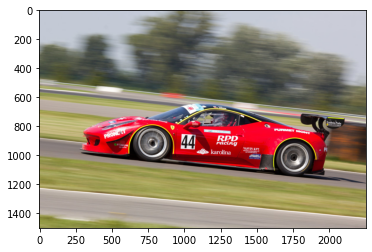

In [162]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
img0 = image.imread('example0.jpg')
# summarize shape of the pixel array
print(img0.dtype, img0.shape)
# display the array of pixels as an image
pyplot.imshow(img0)
pyplot.show()

### IPython.display.Image

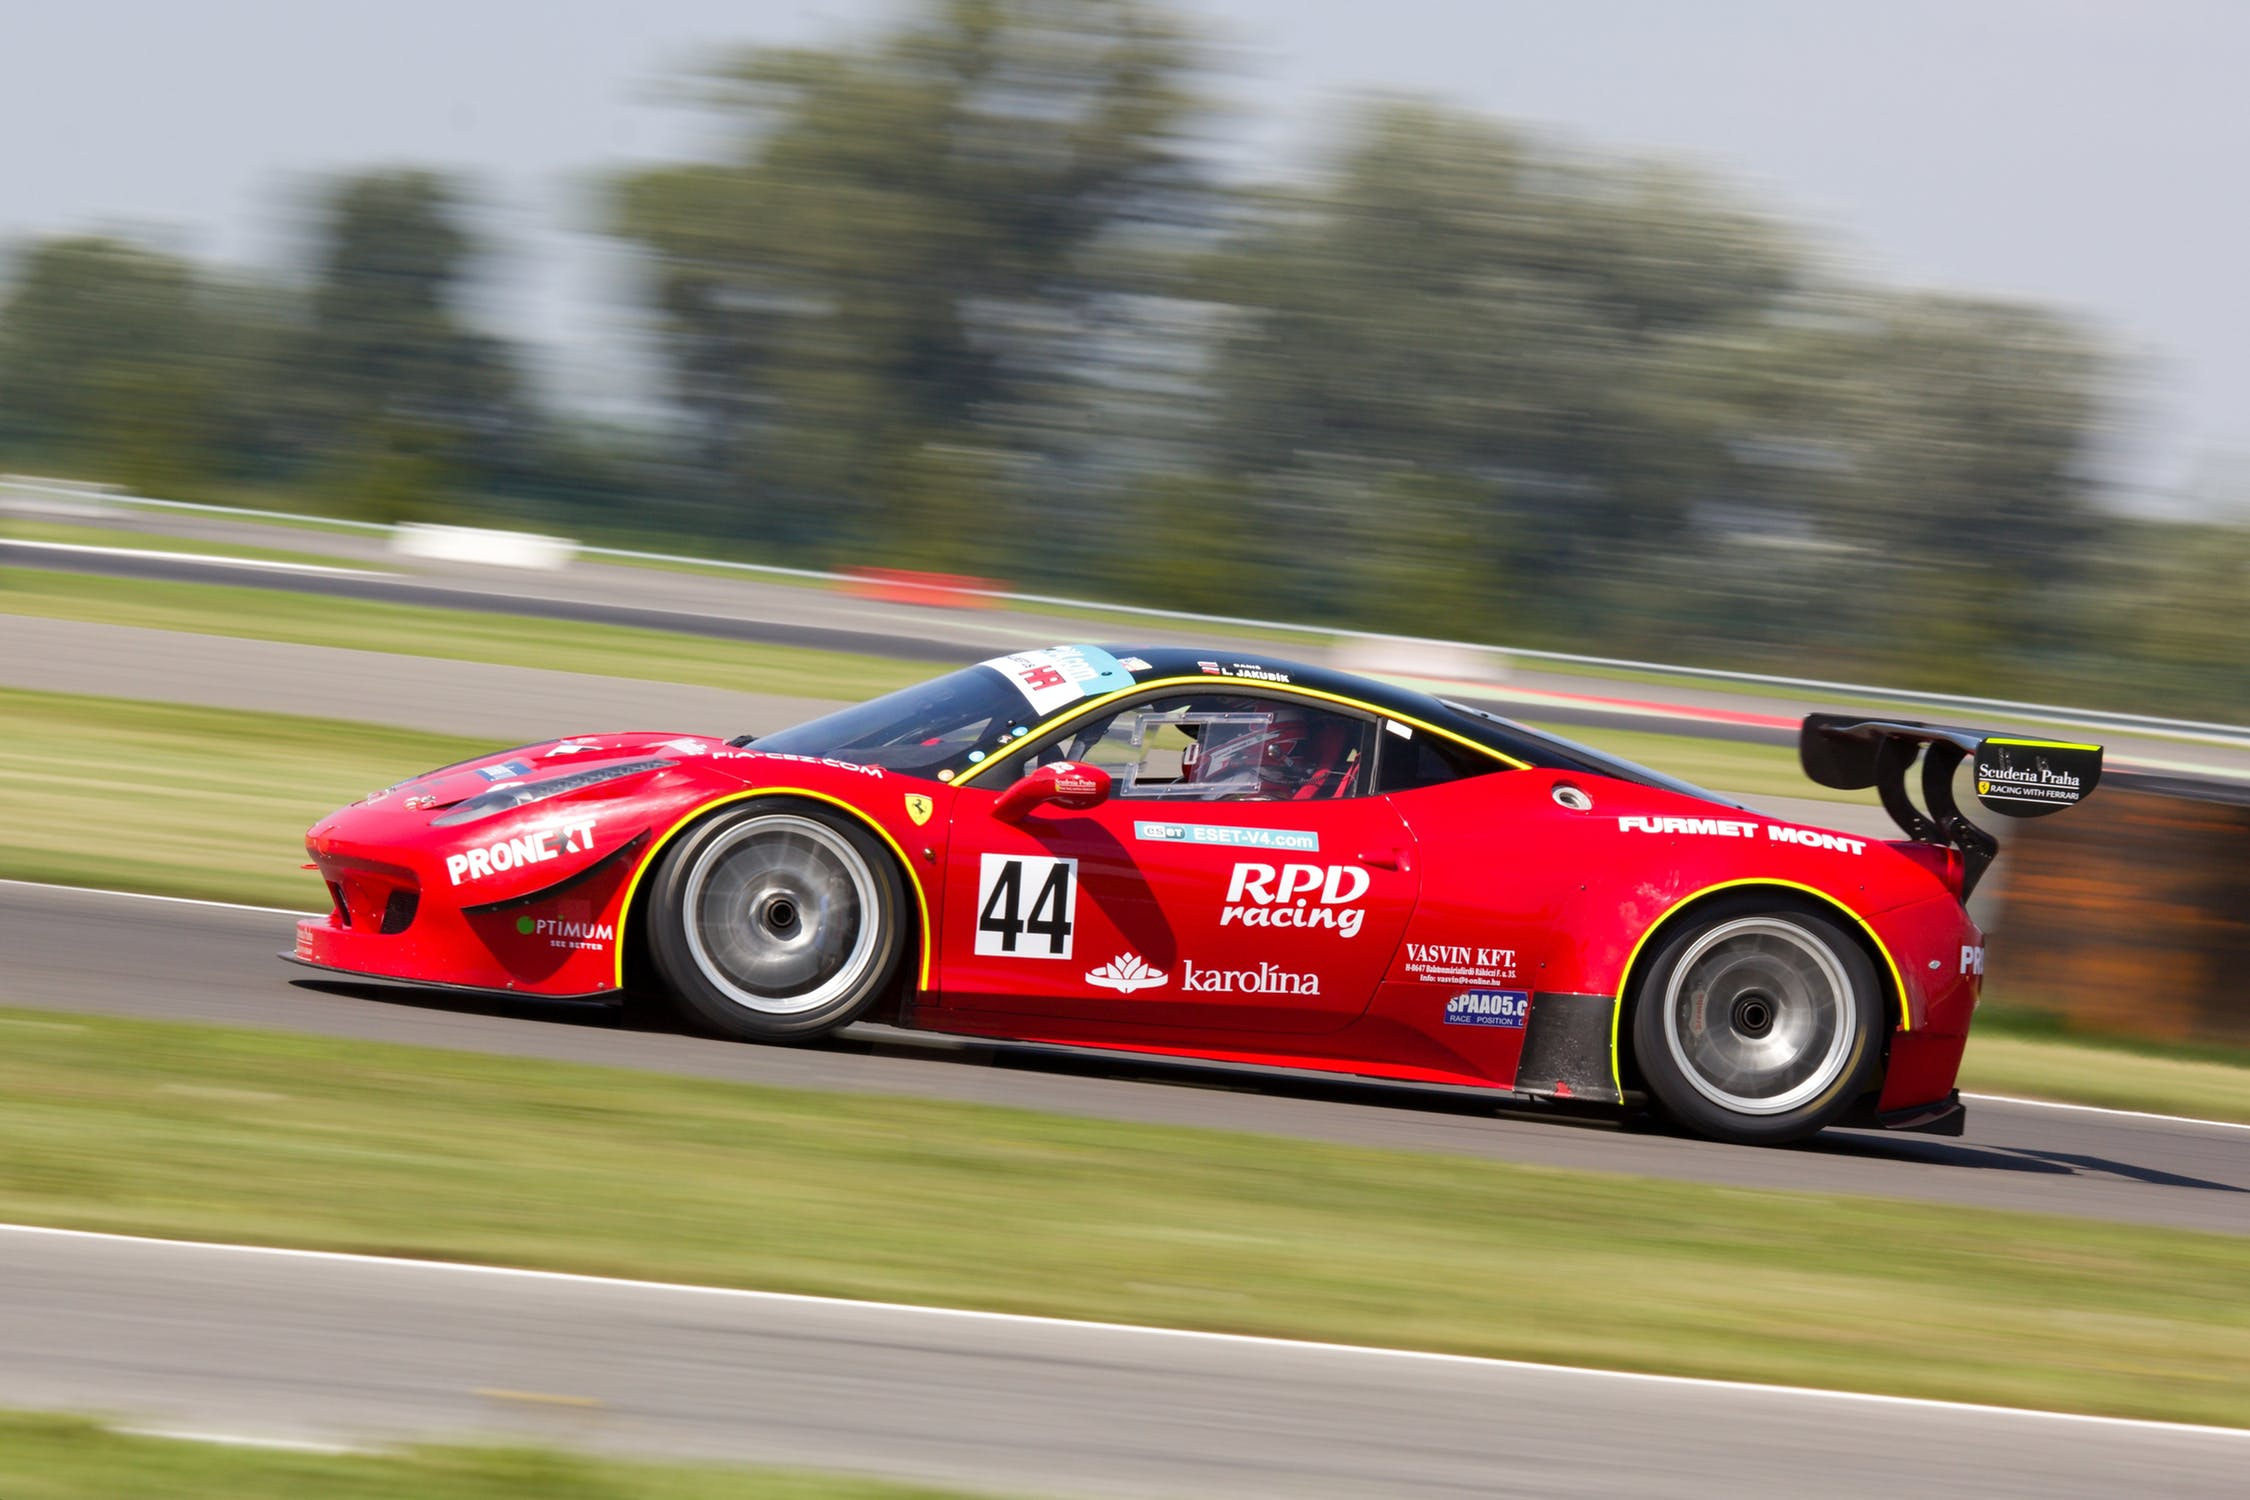

In [230]:
"""
shouldn't confuse this with 
from tensorflow.keras.preprocessing import image
"""
# method4
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

### keras.preprocessing.image

In [217]:
from tensorflow.keras.preprocessing import image
# img0 = process_img_path('example0.jpg')
img0 = image.load_img('example0.jpg', target_size=(224, 224))

print(img0.size, type(img0))

# convert to ndarray
x = image.img_to_array(img0)

# alternative way
data = np.array(img0)

print("\n", type(x), x.shape, "\n")
np.array_equal(x, data)

(224, 224) <class 'PIL.Image.Image'>

 <class 'numpy.ndarray'> (224, 224, 3) 



True

In [228]:
img_lookup(process_img_path('example0.jpg'), 'banana')

features type: <class 'numpy.ndarray'>


[('racer', 0.9256288)]

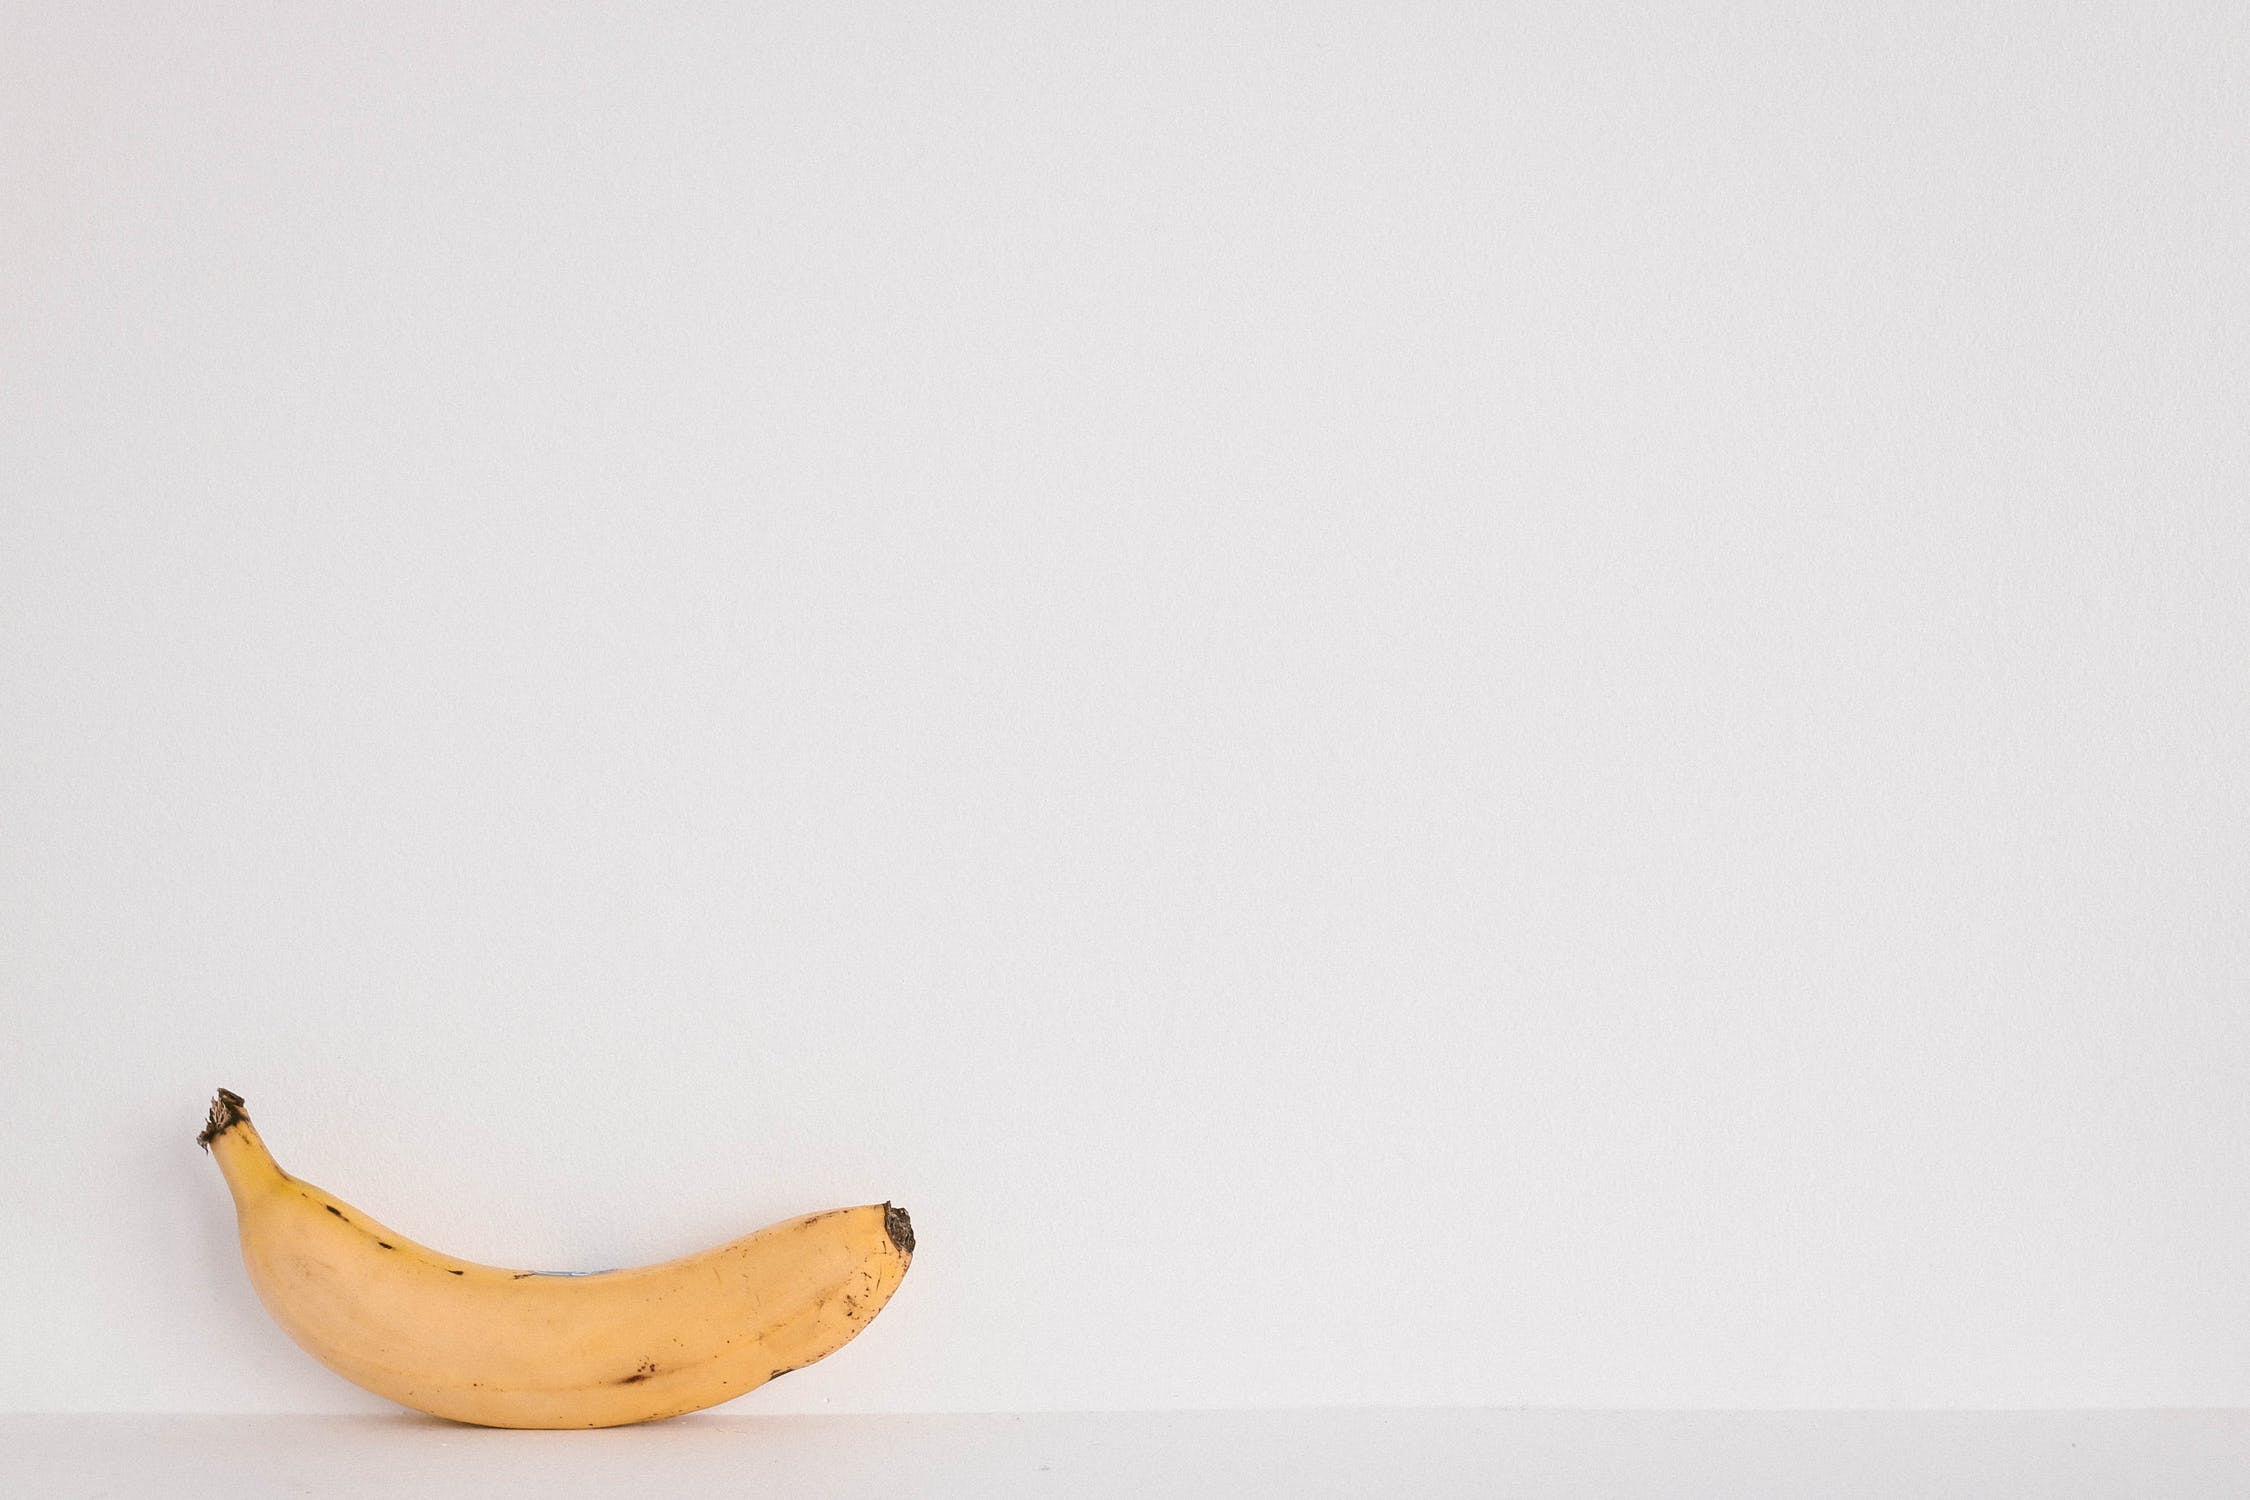

In [231]:
Image(filename='example1.jpg', width=600)

In [232]:
img_lookup(process_img_path('example1.jpg'), 'banana')

features type: <class 'numpy.ndarray'>


[('hook', 0.07773932), ('banana', 0.070150524)]

Notice that, while it gets it right, the confidence for the banana image is fairly low. That's because so much of the image is "not-banana"! How can this be improved? Bounding boxes to center on items of interest.

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is a function applied to another function to produce a third function
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- *_Deep Learning_*. Goodfellow *et al.*
- *Hands-on Machine Learnign with Scikit-Learn, Keras & Tensorflow*
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Keras Conv2D: Working with CNN 2D Convolutions in Keras](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)